## Titanic dataset playground

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

### Load the dataset

In [2]:
dataset = pd.read_csv('train_titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing values

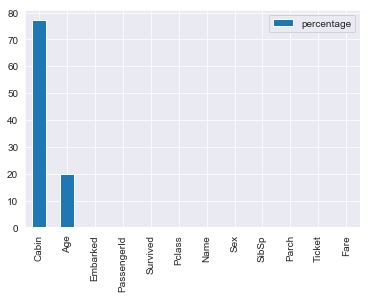

In [3]:
missing_data = pd.DataFrame(
    {
        'percentage': dataset.isnull().sum() / len(dataset) * 100
    }
).sort_values(by='percentage', ascending=False).plot.bar()

In [4]:
dataset.drop(['Cabin'], axis=1, inplace=True)
dataset['Age'] = dataset['Age'].fillna(int(dataset['Age'].mean()))

### Feature mining

In [5]:
dataset = dataset.join(pd.get_dummies(dataset['Sex']))
dataset = dataset.join(pd.get_dummies(dataset['Embarked']))

tmp_class = pd.get_dummies(dataset['Pclass'])
tmp_class.columns = ['Class1', 'Class2', 'Class3']
dataset = dataset.join(tmp_class)

dataset['Family'] = dataset['Parch'] + dataset['SibSp']

dataset.drop([
    'PassengerId', 
    'Name', 
    'Ticket', 
    'Parch', 
    'SibSp', 
    'Sex', 
    'Pclass',
    'Embarked'
], axis=1, inplace=True)

dataset.head()

,Survived,Age,Fare,female,male,C,Q,S,Class1,Class2,Class3,Family
0,0,22.0,7.2500,0,1,0,0,1,0,0,1,1
1,1,38.0,71.2833,1,0,1,0,0,1,0,0,1
2,1,26.0,7.9250,1,0,0,0,1,0,0,1,0
3,1,35.0,53.1000,1,0,0,0,1,1,0,0,1
4,0,35.0,8.0500,0,1,0,0,1,0,0,1,0


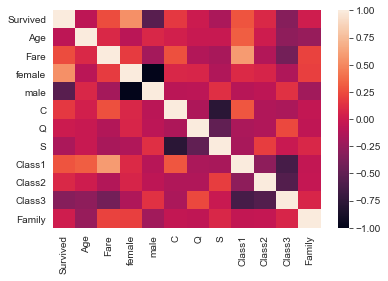

In [6]:
sns.heatmap(dataset.corr())

### Data visualization

In [7]:
survivors = dataset[dataset['Survived'] == 1]
non_survivors = dataset[dataset['Survived'] == 0]

#### Is there a correlation between sex and survival rate?

Text(0.5, 1.0, 'Is there a correlation between sex and survival rate?')

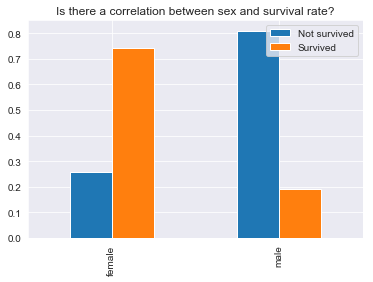

In [8]:
women = len(dataset[dataset['female'] == 1])
men = len(dataset[dataset['male'] == 1])

pd.DataFrame({
    'Survived': [
        survivors.loc[survivors['female'] == 1].count()[0] / women,
        survivors.loc[survivors['male'] == 1].count()[0] / men
    ],
    'Not survived': [
        non_survivors.loc[non_survivors['female'] == 1].count()[0] / women,
        non_survivors.loc[non_survivors['male'] == 1].count()[0] / men
    ]
}, index=['female', 'male']).plot.bar()

plt.title("Is there a correlation between sex and survival rate?")

#### Are kids more likely to survive?

Text(0.5, 1.0, 'Are kids more likely to survive?')

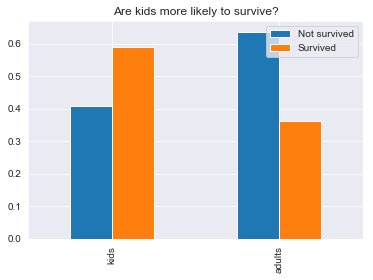

In [9]:
kids = len(dataset[dataset['Age'] < 16])
adults = len(dataset[dataset['Age'] >= 16])

pd.DataFrame({
    'Survived': [
        survivors.loc[survivors['Age'] < 16].count()[0] / kids,
        survivors.loc[survivors['Age'] >= 16].count()[0] / adults
    ],
    'Not survived': [
        non_survivors.loc[non_survivors['Age'] < 16].count()[0] / kids,
        non_survivors.loc[non_survivors['Age'] >= 16].count()[0] / adults
    ]
}, index=['kids', 'adults']).plot.bar()

plt.title("Are kids more likely to survive?")

Is there a correlation between travelling class and survival?

Text(0.5, 1.0, 'Is there a correlation between travelling class and survival?')

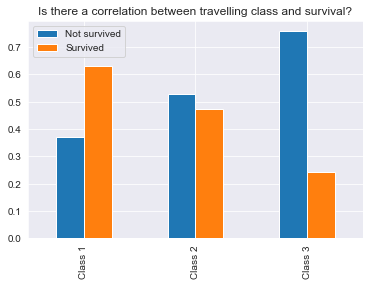

In [10]:
class1 = len(dataset[dataset['Class1'] == 1])
class2 = len(dataset[dataset['Class2'] == 1])
class3 = len(dataset[dataset['Class3'] == 1])

pd.DataFrame({
    'Survived': [
        survivors.loc[survivors['Class1'] == 1].count()[0] / class1,
        survivors.loc[survivors['Class2'] == 1].count()[0] / class2,
        survivors.loc[survivors['Class3'] == 1].count()[0] / class3
    ],
    'Not survived': [
        non_survivors.loc[non_survivors['Class1'] == 1].count()[0] / class1,
        non_survivors.loc[non_survivors['Class2'] == 1].count()[0] / class2,
        non_survivors.loc[non_survivors['Class3'] == 1].count()[0] / class3
    ]
}, index=['Class 1', 'Class 2', 'Class 3']).plot.bar()

plt.title("Is there a correlation between travelling class and survival?")

### Trainig classifiers

#### Split data in training and testing dataset

In [12]:
training_size = int(dataset.shape[0] * 0.9)
X_train = dataset.head(training_size).drop(columns='Survived')
y_train = dataset['Survived'].head(training_size)

test_size = int(dataset.shape[0] - training_size)
X_test = dataset.tail(test_size).reset_index(drop = True).drop(columns='Survived')
y_test = dataset['Survived'].tail(test_size).reset_index(drop = True)

print("Training dataset size:   {}".format(training_size))
print("Testing dataset size:    {}".format(test_size))

Training dataset size:   801
Testing dataset size:    90


#### SVMs

In [21]:
from sklearn import svm

clf_svm = svm.SVC(gamma='auto', probability=True)
clf_svm.fit(X_train, y_train)

print("SVM accuracy on the test data: {}%".format(np.round(clf_svm.score(X_test, y_test) * 100, 2)))

SVM accuracy on the test data: 83.33%


####  Decision trees 
Implementation from scratch

In [22]:
import decision_trees

clf_dt = decision_trees.ClassificationDecisionTree()
clf_dt.train(X_train, y_train, max_depth = 6)
predictions = np.array([clf_dt.predict(X_test.loc[[i]]) for i in range(test_size)]).astype('int')

correct = np.equal(predictions, y_test)
accuracy = np.round(np.sum(correct) / len(correct) * 100, 2)
print('Decision tree accuracy on the test data:: {} %'.format(accuracy))

Decision tree accuracy on the test data:: 84.44 %


#### Random forests

In [33]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators = 1000, max_features = 5)
clf_rf.fit(X_train, y_train)

accuracy = np.round(clf_rf.score(X_test, y_test) * 100, 2)
print("Random Forest accuracy on the test data: {}%".format(accuracy))

Random Forest accuracy on the test data: 86.67%


#### Ensemble models

In [34]:
from sklearn.ensemble import VotingClassifier

clf_voting = VotingClassifier(
    estimators=[
        ('svm', clf_svm),
        ('rf', clf_rf)
    ], voting='soft')
clf_voting.fit(X_train, y_train)

accuracy = np.round(clf_voting.score(X_test, y_test) * 100, 2)
print("Voting method accuracy on the test data: {}%".format(accuracy))

Voting method accuracy on the test data: 87.78%
